In [13]:

import pyodbc    
from dotenv import dotenv_values
import warnings 
warnings.filterwarnings('ignore')
from statsmodels.tools.sm_exceptions import ValueWarning

#libraries for handling data
import pandas as pd
import numpy as np 
import os
import glob

import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# load environment variables from.env file into dictionary
environment_variables = dotenv_values(".env")
 
# get the values for the environment variables
server = environment_variables.get("server")
user = environment_variables.get("user")
password = environment_variables.get("password")
database = environment_variables.get("database")
 
# Create a database connection string using pyodbc
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={user};PWD={password}"

#Establish a connection to the database
try:
    connection = pyodbc.connect(connection_string)
    print("Connection successful")    
except Exception as e:
    print("Connection failed:", e)

Connection successful


In [ ]:
# cursor = connection.cursor()

# # Query to get all tables in the current database
# cursor.execute("""
#     SELECT TABLE_NAME
#     FROM INFORMATION_SCHEMA.TABLES
#     WHERE TABLE_TYPE = 'BASE TABLE'
# """)

# # Fetch and print the list of tables
# tables = cursor.fetchall()
# for table in tables:
#     print(table[0])


In [3]:
# Create a cursor object
cursor = connection.cursor()

# Query to get all table names in the database 
cursor.execute("""
    SELECT TABLE_NAME
    FROM INFORMATION_SCHEMA.TABLES
    WHERE TABLE_TYPE = 'BASE TABLE'
""")
tables = cursor.fetchall()

# Iterate through each table
for table in tables:
    table_name = table[0]
    print(f"Processing table: {table_name}")

    # Query to fetch all data from the table
    query = f"SELECT * FROM {table_name}"
    df = pd.read_sql(query, connection)

    # Save the data to a CSV file
    csv_file = f"{table_name}.csv"
    df.to_csv(csv_file, index=False)
    print(f"Table {table_name} saved as {csv_file}")

Processing table: Sales_July_2019
Table Sales_July_2019 saved as Sales_July_2019.csv
Processing table: Sales_August_2019
Table Sales_August_2019 saved as Sales_August_2019.csv
Processing table: Sales_September_2019
Table Sales_September_2019 saved as Sales_September_2019.csv
Processing table: Sales_October_2019
Table Sales_October_2019 saved as Sales_October_2019.csv
Processing table: Sales_November_2019
Table Sales_November_2019 saved as Sales_November_2019.csv
Processing table: Sales_December_2019
Table Sales_December_2019 saved as Sales_December_2019.csv


In [4]:
# Information about the all 12 datasets, specifically to know the number of rows and columns in all of them 
# Directory where your CSV files are saved
directory = r"C:\Users\DELL\OneDrive\Capstone_Project\data"  # Change this to your actual directory

# Iterate through all files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        # Full file path
        file_path = os.path.join(directory, filename)
        
        # Load the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Get the number of rows and columns
        rows, columns = df.shape
        
        # Print the results
        print(f"File: {filename}, Rows: {rows}, Columns: {columns}")


File: Sales_April_2019.csv, Rows: 18383, Columns: 6
File: Sales_August_2019.csv, Rows: 12011, Columns: 6
File: Sales_December_2019.csv, Rows: 25117, Columns: 6
File: Sales_February_2019.csv, Rows: 12036, Columns: 6
File: Sales_January_2019.csv, Rows: 9723, Columns: 6
File: Sales_July_2019.csv, Rows: 14371, Columns: 6
File: Sales_June_2019.csv, Rows: 13622, Columns: 6
File: Sales_March_2019.csv, Rows: 15226, Columns: 6
File: Sales_May_2019.csv, Rows: 16635, Columns: 6
File: Sales_November_2019.csv, Rows: 17661, Columns: 6
File: Sales_October_2019.csv, Rows: 20379, Columns: 6
File: Sales_September_2019.csv, Rows: 11686, Columns: 6


In [10]:
# information about the datatypes of columns in the various datasets

# List to store the data types for each dataset
data_types_dict = {}

# Assuming all files are stored in a folder
file_paths = glob.glob('data/*.csv')

# Loop through each file, read it into a DataFrame, and get the data types
for file in file_paths:
    try:
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file)
        
        # Get the file name (optional, for reference)
        file_name = file.split('/')[-1]
        
        # Get the data types of the columns
        data_types = df.dtypes
        
        # Store the data types in a dictionary with the file name as key
        data_types_dict[file_name] = data_types
        
    except Exception as e:
        print(f"Error reading file {file}: {e}")

# Print the data types for each dataset in a structured format
for file_name, data_types in data_types_dict.items():
    print(f"Data types for {file_name}:\n")
    print(data_types)
    print("-" * 50)  # Separator for readability


Data types for data\Sales_April_2019.csv:

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object
--------------------------------------------------
Data types for data\Sales_August_2019.csv:

Order_ID            float64
Product              object
Quantity_Ordered    float64
Price_Each          float64
Order_Date           object
Purchase_Address     object
dtype: object
--------------------------------------------------
Data types for data\Sales_December_2019.csv:

Order_ID            float64
Product              object
Quantity_Ordered    float64
Price_Each          float64
Order_Date           object
Purchase_Address     object
dtype: object
--------------------------------------------------
Data types for data\Sales_February_2019.csv:

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          

all datasets had 6 columns but realized some of the columns had different names. For example Order ID and Order_ID. They are the same but differently represented and some also had different datatypes. We had to make all the necessary corrections and achieve common columns.

In [11]:

# Define a function to clean each dataset
def clean_dataset(df):
    # Rename columns to a consistent format
    df.rename(columns={
        'Order ID': 'Order_ID',
        'Quantity Ordered': 'Quantity_Ordered',
        'Price Each': 'Price_Each',
        'Order Date': 'Order_Date',
        'Purchase Address': 'Purchase_Address'
    }, inplace=True)
    
    # Convert columns to the correct data types
    df['Order_ID'] = df['Order_ID'].astype(str)
    df['Quantity_Ordered'] = pd.to_numeric(df['Quantity_Ordered'], errors='coerce')
    df['Price_Each'] = pd.to_numeric(df['Price_Each'], errors='coerce')
    df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')
    
    return df

# Assuming all files are stored in a folder
file_paths = glob.glob('data/*.csv')

# Read and clean each dataset, then concatenate them
all_data = pd.concat([clean_dataset(pd.read_csv(file)) for file in file_paths], ignore_index=True)

# Save the concatenated data to a new CSV file
all_data.to_csv('cleaned_data.csv', index=False)

# Check the resulting dataframe
print(all_data.info())
print(all_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_ID          186850 non-null  object        
 1   Product           186305 non-null  object        
 2   Quantity_Ordered  185950 non-null  float64       
 3   Price_Each        185950 non-null  float64       
 4   Order_Date        185950 non-null  datetime64[ns]
 5   Purchase_Address  186305 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 8.6+ MB
None
  Order_ID                     Product  Quantity_Ordered  Price_Each  \
0   176558        USB-C Charging Cable               2.0       11.95   
1      nan                         NaN               NaN         NaN   
2   176559  Bose SoundSport Headphones               1.0       99.99   
3   176560                Google Phone               1.0      600.00   
4   176560    

In [12]:
combined_df= pd.read_csv('cleaned_data.csv')
combined_df

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,176558,USB-C Charging Cable,2.0,11.95000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1.0,99.99000,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1.0,600.00000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1.0,11.99000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353.0,AAA Batteries (4-pack),3.0,2.99000,2017-09-19 20:56:00,"840 Highland St, Los Angeles, CA 90001"
186846,259354.0,iPhone,1.0,700.00000,2001-09-19 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355.0,iPhone,1.0,700.00000,2023-09-19 07:39:00,"220 12th St, San Francisco, CA 94016"
186848,259356.0,34in Ultrawide Monitor,1.0,379.98999,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"


### EDA

Missing values:
 Order_ID            740
Product             545
Quantity_Ordered    900
Price_Each          900
Order_Date          900
Purchase_Address    545
dtype: int64

Descriptive statistics:
        Quantity_Ordered     Price_Each
count     185950.000000  185950.000000
mean           1.124383     184.399734
std            0.442793     332.731329
min            1.000000       2.990000
25%            1.000000      11.950000
50%            1.000000      14.950000
75%            1.000000     150.000000
max            9.000000    1700.000000


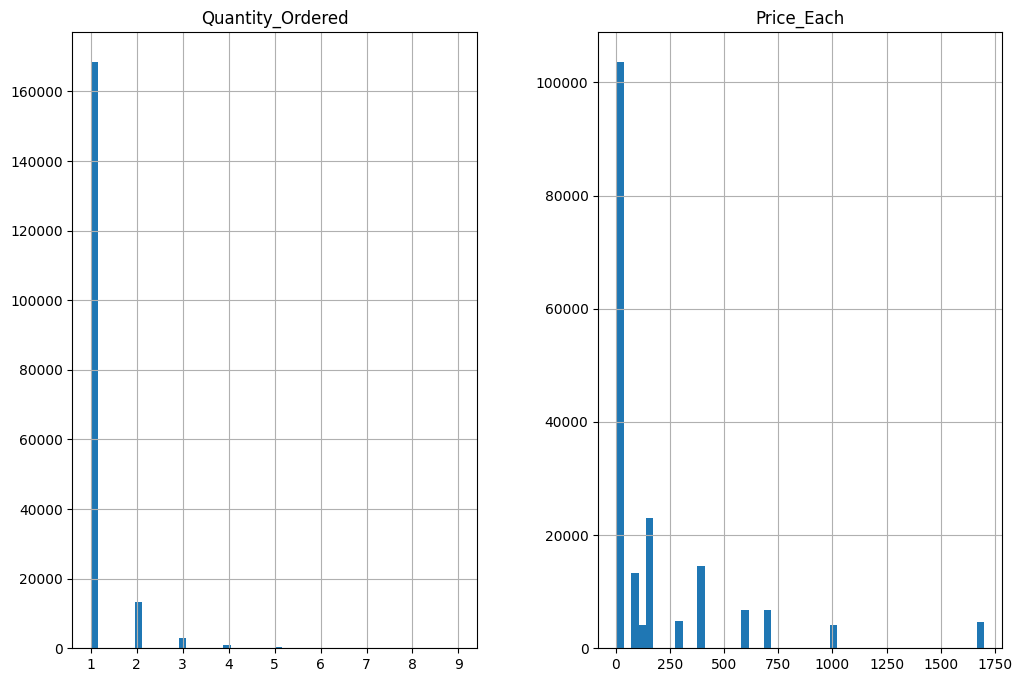


Categorical value counts:
 Product
USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Product                         355
Name: count, dtype: int64


In [18]:

# Load the combined dataset
combined_df

# 1. Check for Missing Values
print("Missing values:\n", combined_df.isnull().sum())

# 2. Descriptive Statistics
print("\nDescriptive statistics:\n", combined_df.describe())

# 3. Data Distribution for Numerical Columns
combined_df.hist(bins=50, figsize=(12, 8))
plt.show()

# 4. Categorical Variable Analysis
print("\nCategorical value counts:\n", combined_df['Product'].value_counts())


UNIVARIATE ANALYSIS

array([[<Axes: title={'center': 'Order_ID'}>,
        <Axes: title={'center': 'Quantity_Ordered'}>],
       [<Axes: title={'center': 'Price_Each'}>, <Axes: >]], dtype=object)

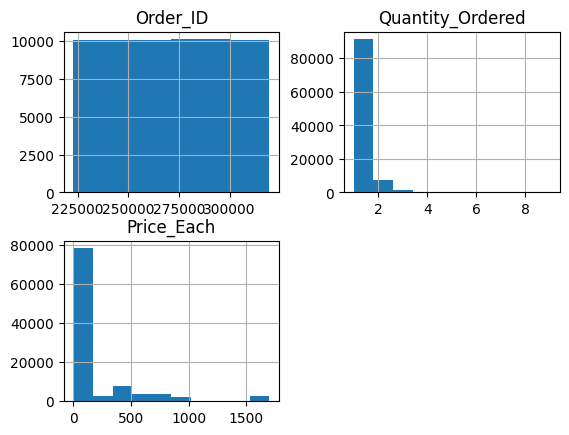

In [44]:
# plot histogram on the numerical columns 
combined_df.hist()


Product
USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Product                         355
Name: count, dtype: int64


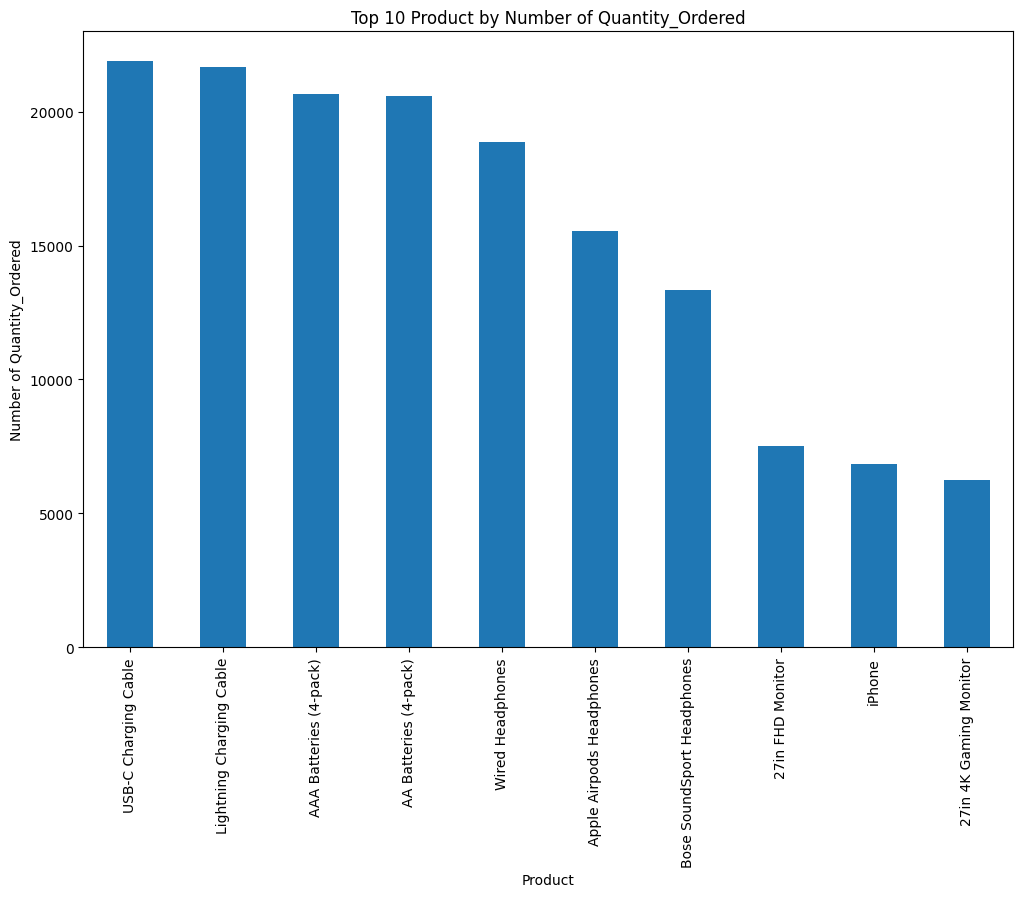

In [51]:
# Frequency count
print(combined_df['Product'].value_counts())

# Bar plot for top 10 products by number of 'Quantity_Ordered'
plt.figure(figsize=(12, 8))
combined_df['Product'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Product by Number of Quantity_Ordered')
plt.xlabel('Product')
plt.ylabel('Number of Quantity_Ordered')
plt.show()

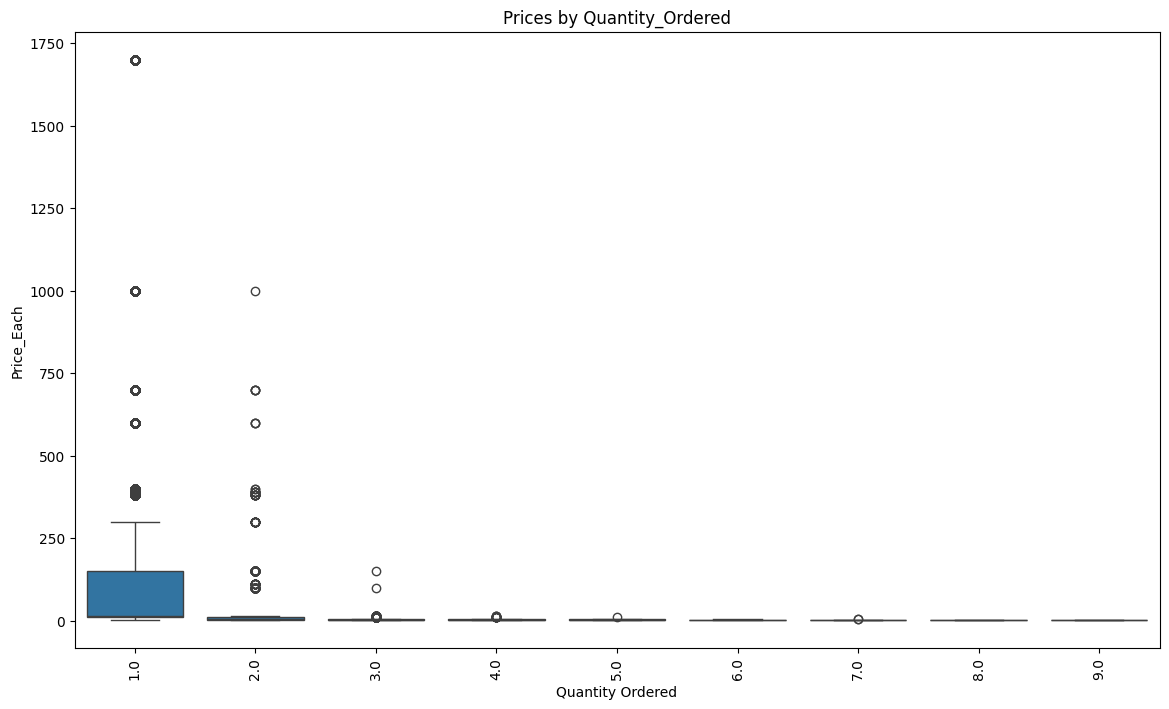

In [57]:
# Boxplot to show distribution of prices across quantities ordered
plt.figure(figsize=(14, 8))

# Ensuring that 'Quantity_Ordered' is treated as a categorical variable
sns.boxplot(x='Quantity_Ordered', y='Price_Each', data=combined_df)

plt.title('Prices by Quantity_Ordered')
plt.xlabel('Quantity Ordered')
plt.ylabel('Price_Each')
plt.xticks(rotation=90)  # Rotating x-ticks for better visibility if needed
plt.show()
